 #  A Whale off the Port(folio)

An evaluation of the performance among various algorithmic, hedge, and mutual fund portfolios and comparison against the S&P 500.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

# matplotlib enables creating graphs inside the notebook
%matplotlib inline

# Data Cleaning

This section will read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, DataFrames will be combined into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set the file path to whale_returns_csv
whale_returns_csv = Path("Resources/whale_returns.csv")

# Read in the CSV as a DataFrame
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Check how the DataFrame looks
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop whole record if it has at least one null value; inplace=True to apply the change to the DataFrame and not a copy of the DataFrame
whale_returns_df.dropna(inplace=True)

# Check all nulls were dropped
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Set the file path to algo_returns_csv
algo_returns_csv = Path("Resources/algo_returns.csv")

# Read in the CSV as a DataFrame
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Check how the DataFrame looks
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# As above, drop whole record if it has at least one null value
algo_returns_df.dropna(inplace=True)

# Check all nulls were dropped
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Sort in ascending order
#algo_returns_df.sort_index(inplace=True)
#algo_returns_df.head(10)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Set the file path to sp500_history_csv
sp500_history_csv = Path("Resources/sp500_history.csv")

# Reading in the CSV of S&P 500 Closing Prices as a DataFrame
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Check how the DataFrame looks
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check column Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Clean $ symbols from close price so Data Type can be converted to float
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")

#Check $ symbols are removed
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [12]:
# Convert 'Close' to a float Data Type
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

# Recheck column Data Types
sp500_history_df.dtypes

Close    float64
dtype: object

In [13]:
# Sort in ascending order
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename Close Column to S&P 500
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
concat_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns")
concat_df.dropna(inplace=True)
concat_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

This section will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and plot the daily returns and cumulative returns

##### Calculate daily returns

In [18]:
# The DataFrame already represents daily return values
# The following would calculate daily returns based on prices
    #daily_returns = concat_df.pct_change()
    
# For readability, set the concatenated DataFrame = daily_returns
daily_returns = concat_df

##### Plot daily returns

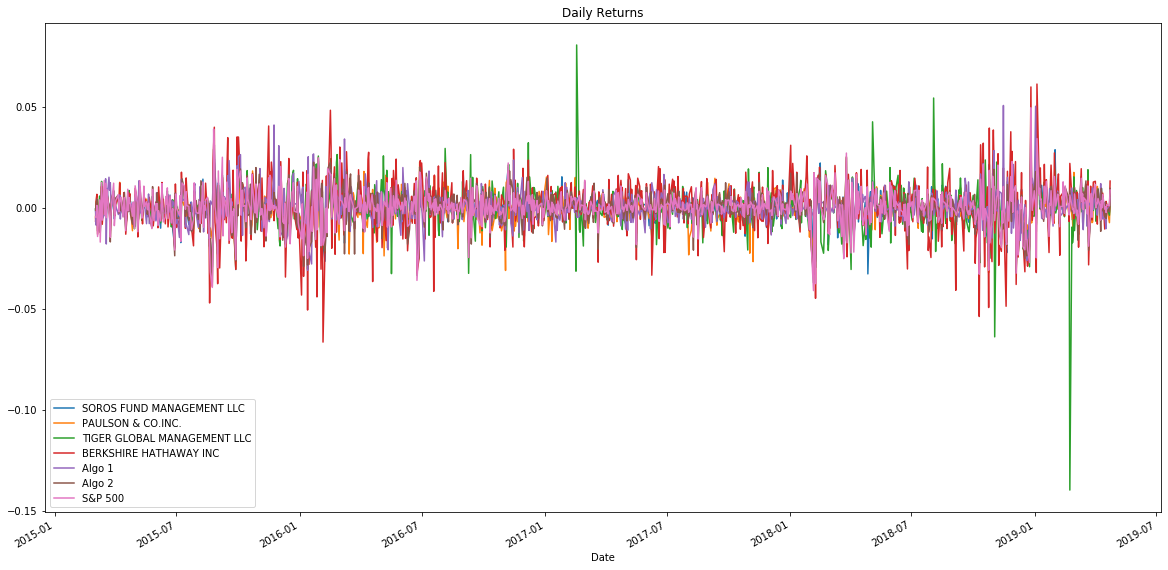

In [19]:
# Use .plot to plot daily returns and include figsize to increase the size of the chart
daily_returns.plot(figsize=(20,10), title="Daily Returns")

##### Plot cummulative returns

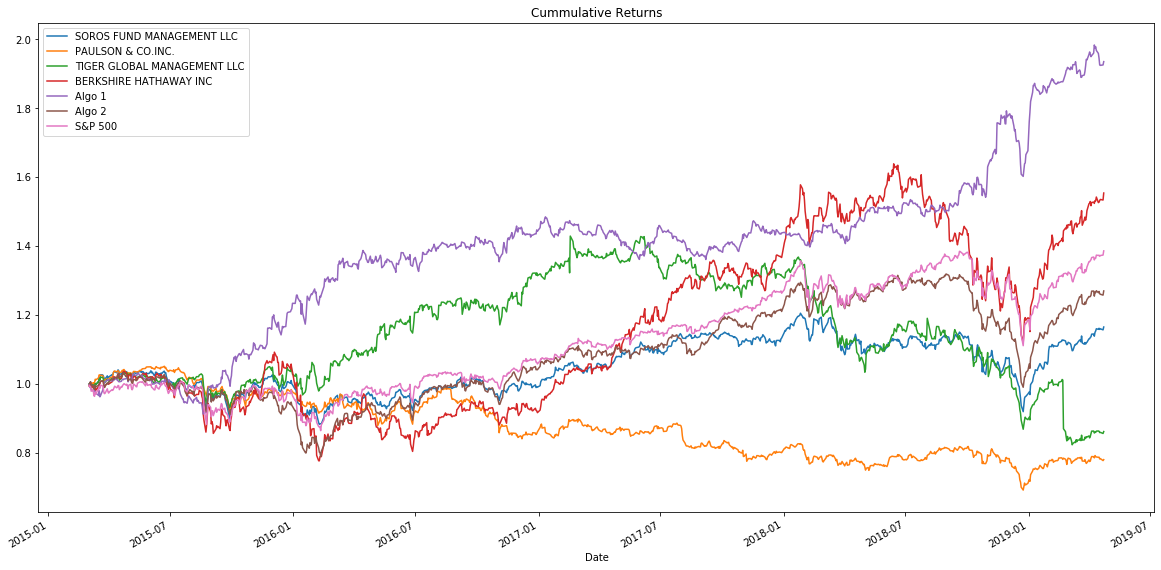

In [20]:
# Plot cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cummulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:


##### Box plot to visually show risk

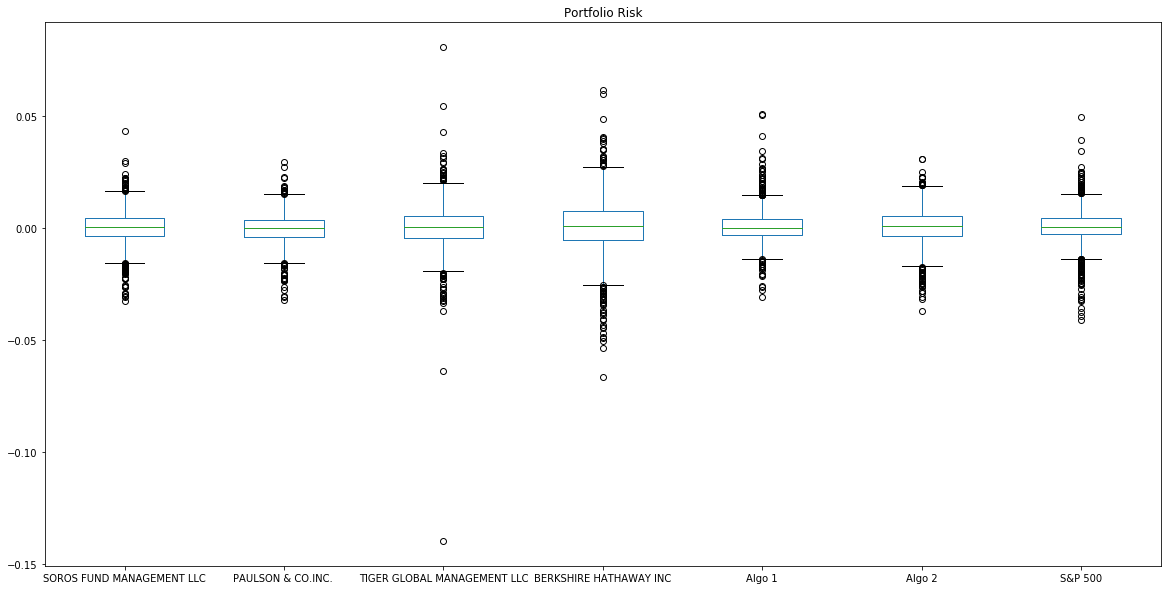

In [66]:
# Create a box plot for each portfolio
daily_returns.plot.box(figsize=(20,10), title="Portfolio Risk")

##### Daily Standard Deviation

In [22]:
# Calculate the standard deviation for each portfolio
daily_std = daily_returns.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

##### Which portfolios are riskier than the S&P 500?

In [56]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = daily_std > daily_std['S&P 500']
riskier_than_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

##### Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

##### Rolling standard deviation plot

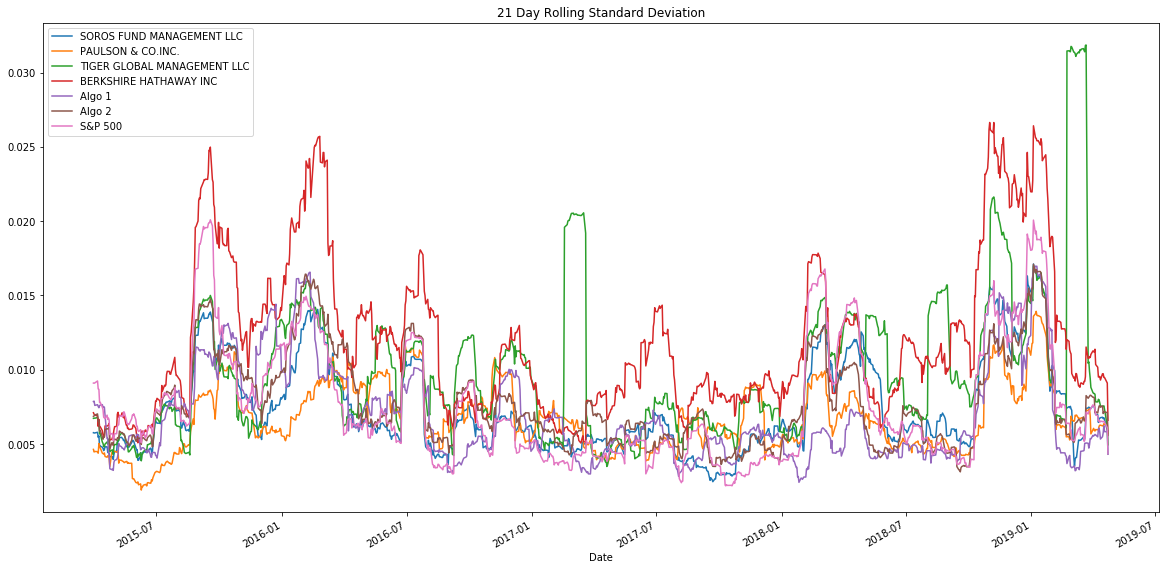

In [25]:
# Calculate and plot the rolling standard deviation for
# each portfolio using a rolling 21 trading day window
daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

##### Correlation table

In [26]:
# Construct a correlation table across all portfolios
daily_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


##### Calculate beta for Algo 1 compared to the total market (S&P 500)

In [58]:
# Calculate covariance
covariance = daily_returns['Algo 1'].cov(daily_returns['S&P 500'])

#Calculate variance
variance = daily_returns['S&P 500'].var()

# Calculate beta of Algo 1
algo1_beta = covariance / variance
print(f"The Beta for the Algo 1 portfolio is {algo1_beta}.")

The Beta for the Algo 1 portfolio is 0.24899091459425748.


In [60]:
# Calculate rolling 21-day covariance of Algo 1 and the market (S&P 500)
rolling_covariance = daily_returns['Algo 1'].rolling(window=21).cov(daily_returns['S&P 500'])
# Plot rolling 21-day covariance
#rolling_covariance.plot(figsize=(20,10), title='Rolling 21-Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

In [61]:
# Calculate rolling 21-day variance of the market (S&P 500)
rolling_variance = daily_returns['S&P 500'].rolling(window=21).var()
# Plot rolling 21-day variance
#rolling_variance.plot(figsize=(20,10), title='Rolling 21-Day Variance of S&P 500 Returns')

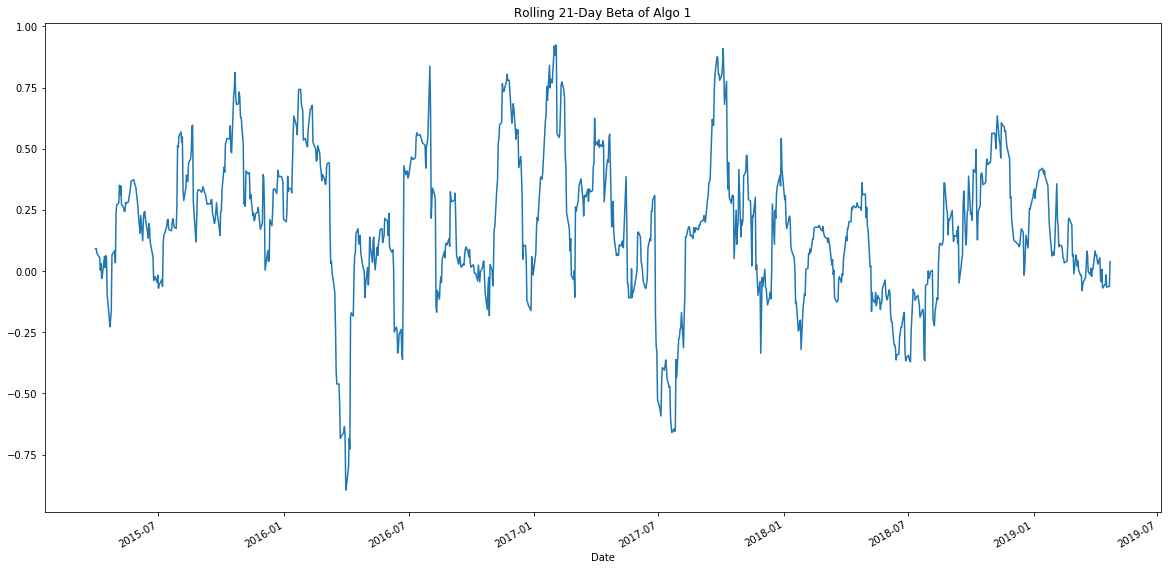

In [62]:
# Calculate rolling 21-day beta of Algo 1
rolling_beta = rolling_covariance / rolling_variance
# Plot rolling 21-day beta
rolling_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of Algo 1')

### Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations.

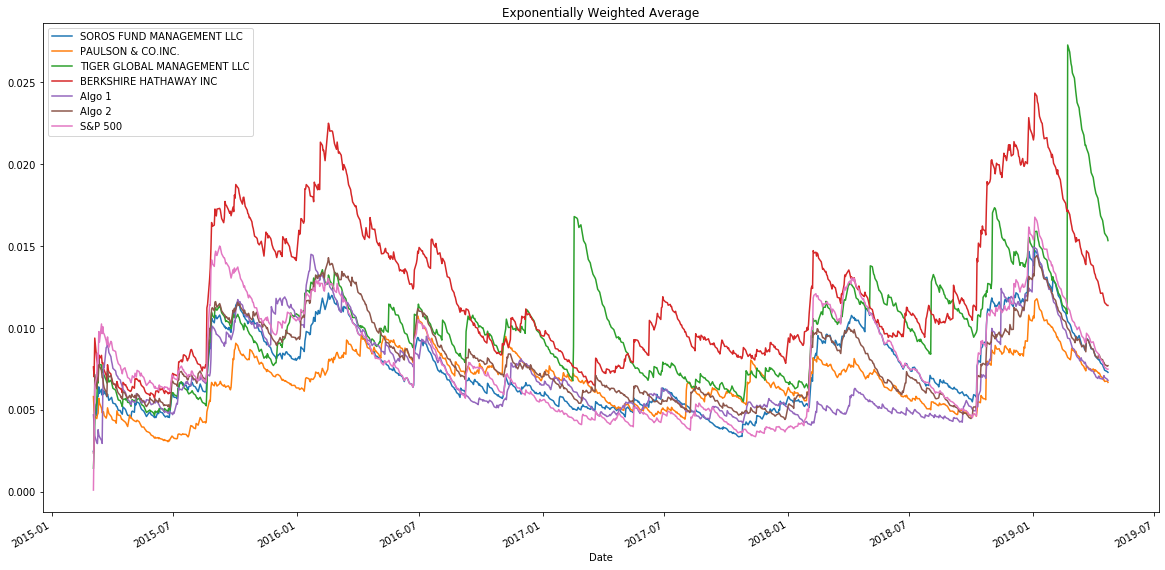

In [64]:
ewa = daily_returns.ewm(halflife=21).std()
ewa.plot(figsize=(20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one!)

##### Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [32]:
# Calculate annualized Sharpe ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

##### Plot these sharpe ratios using a barplot

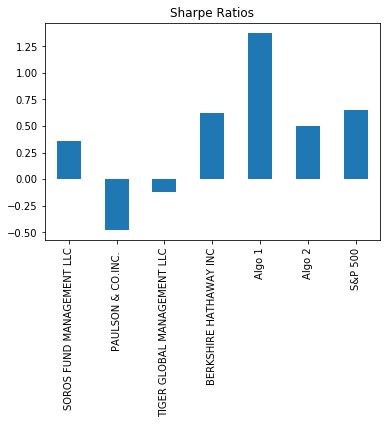

In [33]:
# Visualize the Sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# Quantitative Analysis
### Performance Analysis
#### Does any portfolio outperform the S&P 500?
Algo 1 followed by Berkshire Hathaway are the only two portfolios to outperform the S&P 500.
### Risk Analysis
#### Which box has the largest spread? Which has the smallest spread?
Berkshire Hathaway has the largest box spread while Algo 1 has the smallest box spread.
#### Which portfolios are riskier than the S&P 500?
By measure of standard deviation, Berkshire Hathaway and Tiger Global Management are riskier than the S&P 500.
### Rolling Statistics
#### Does the risk increase for each of the portfolios increase at the same time risk increases in the S&P 500?
Risk, based on the 21 day rolling standard deviation, does trend with the S&P 500.
#### Which returns most closely mimic the S&P 500?
Algo 2 most closely mimics the S&P 500 with the highest correlation (0.858764) to the S&P 500 among all portfolios in the dataset.
#### Does the portfolio seem sensitive to movements in the S&P 500?
The Algo 1 portfolio is less sensitive than the market with a beta under 1 but most of the time above zero.
#### On a Sharpe ratio basis, do the algo strategies outperform both 'the market' and the whales?
Only Algo 1 outperforms both the market and the whales based on Sharpe ratio. Algo 2 outperformed Soros Fund Managment, Paulson & Co., and Tiger Global Management.

---

# Portfolio Returns

Build a custom portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

Stocks:
1. Google
2. Apple
3. Costco

## 1 year's worth of historic prices for GOOG, AAPL, COST concatenated into a DataFrame of the closing prices and dates for each stock

In [67]:
# Read the first stock
goog_historical_csv = Path("Resources/goog_historical.csv")

goog_historical_df = pd.read_csv(goog_historical_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical_df.sort_values(by=['Trade DATE'], inplace=True)

# Display a few rows
goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [68]:
# Read the second stock
aapl_historical_csv = Path("Resources/aapl_historical.csv")

aapl_historical_df = pd.read_csv(aapl_historical_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical_df.sort_values(by=['Trade DATE'], inplace=True)

# Display a few rows
aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [69]:
# Read the third stock
cost_historical_csv = Path("Resources/cost_historical.csv")

cost_historical_df = pd.read_csv(cost_historical_csv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical_df.sort_values(by=['Trade DATE'], inplace=True)

# Display a few rows
cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [74]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([goog_historical_df, aapl_historical_df, cost_historical_df], axis="rows", join="inner")
custom_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [38]:
# Reset the index
custom_df = custom_df.reset_index()
custom_df.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [39]:
# Pivot so that each column of prices represents a unique symbol
pivot_df = custom_df.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
pivot_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [40]:
# Drop Nulls
pivot_df = pivot_df.pct_change()
pivot_df.dropna(inplace=True)
pivot_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

pivot_df.dot(weights).head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
all_returns_df = pd.concat([daily_returns, pivot_df.dot(weights)], axis="columns", join="inner")
all_returns_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500', 'Custom']
all_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with the custom portfolio to see how it compares to the other portfolios

In [44]:
# Risk
new_daily_std = all_returns_df.std()
new_annualized_std = new_daily_std * np.sqrt(252)
new_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

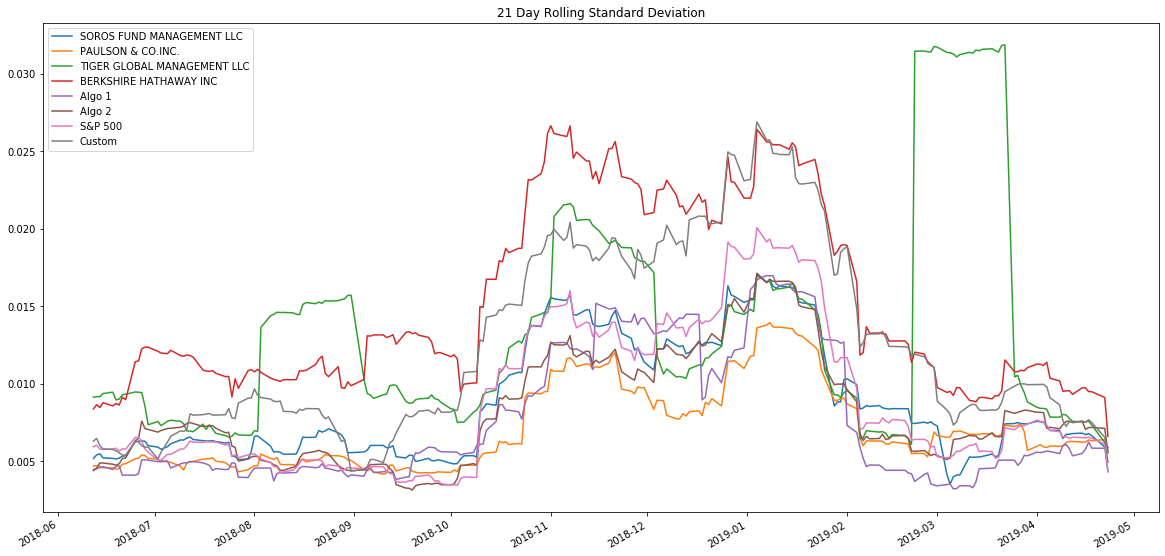

In [45]:
# Rolling Statistics
all_returns_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [46]:
# Beta
# Calculate covariance of all daily returns of custom portfolio vs. S&P 500
new_covariance = all_returns_df['Custom'].cov(all_returns_df['S&P 500'])
# Calculate variance of all daily returns of S&P 500
new_variance = all_returns_df['S&P 500'].var()
# Calculate beta of all daily returns of custom portfolio
custom_beta = new_covariance / new_variance
print(f"The Beta for the Custom portfolio is {custom_beta}.")

The Beta for the Custom portfolio is 1.2127120076458702.


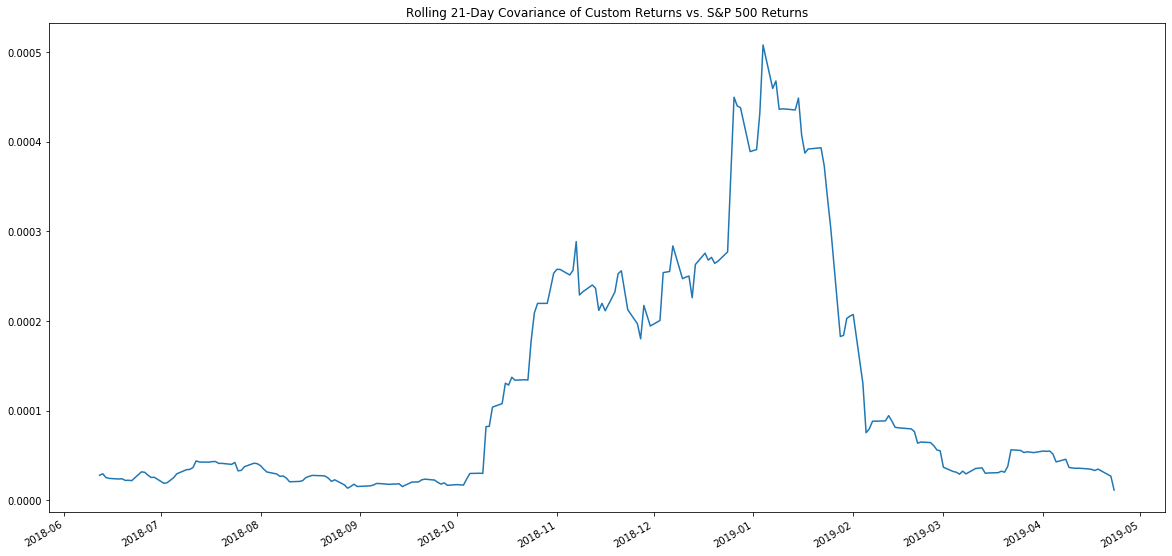

In [47]:
# Calculate 21-day rolling covariance of the custom portfolio vs. S&P 500 and plot the data
new_rolling_covariance = all_returns_df['Custom'].rolling(window=21).cov(all_returns_df['S&P 500'])
new_rolling_covariance.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Custom Returns vs. S&P 500 Returns')

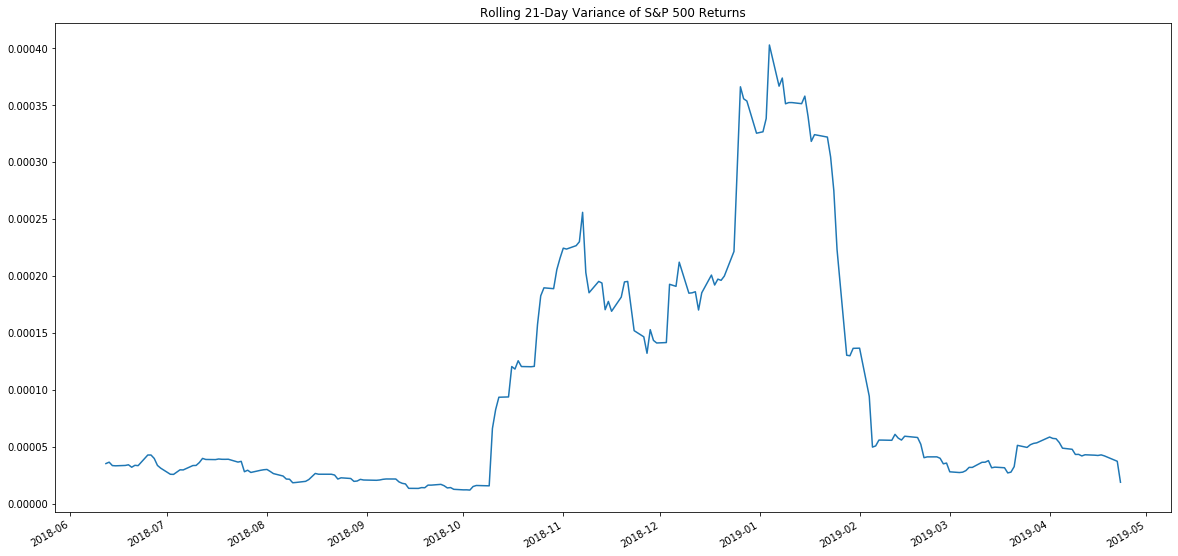

In [48]:
# Calculate 21-day rolling variance of the custom portfolio vs. S&P 500 and plot the data
new_rolling_variance = all_returns_df['S&P 500'].rolling(window=21).var()
new_rolling_variance.plot(figsize=(20, 10), title='Rolling 21-Day Variance of S&P 500 Returns')

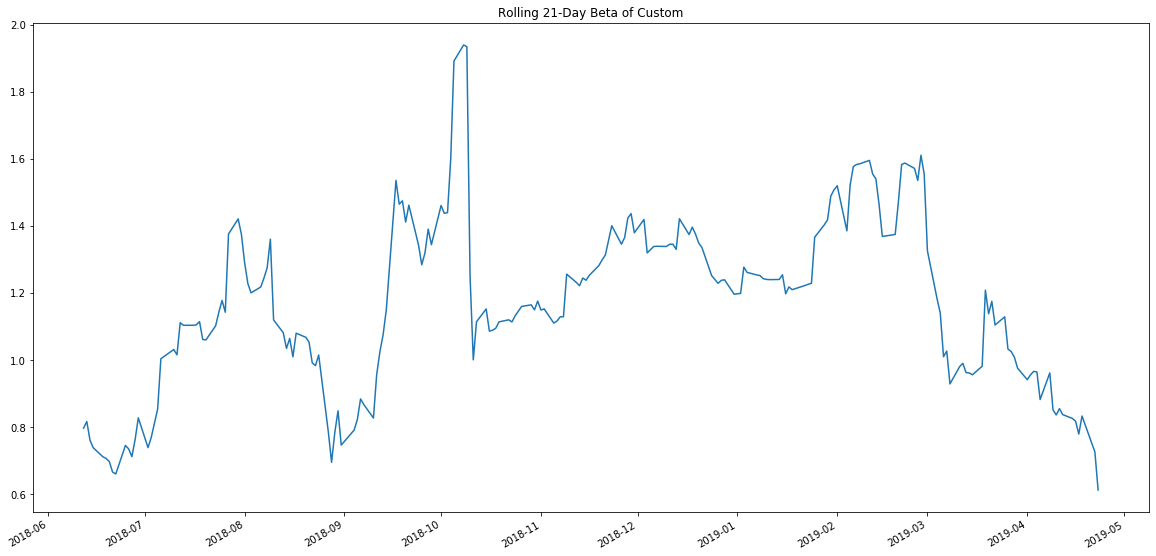

In [49]:
# Calculate 21-day rolling beta of the custom portfolio and plot the data
new_rolling_beta = new_rolling_covariance / new_rolling_variance
new_rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Custom')

In [50]:
# Annualized Sharpe Ratios
new_sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

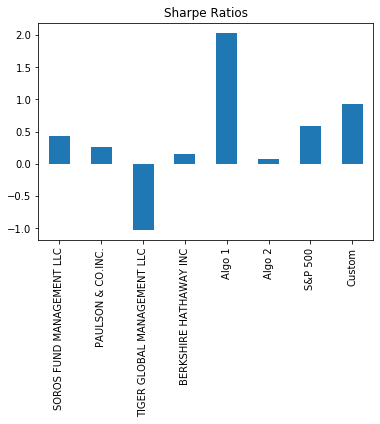

In [51]:
# Visualize the Sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Correlation analysis to determine which stocks (if any) are correlated

#### Correlation Table

In [52]:
correlation = all_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


#### Correlation Heat Map

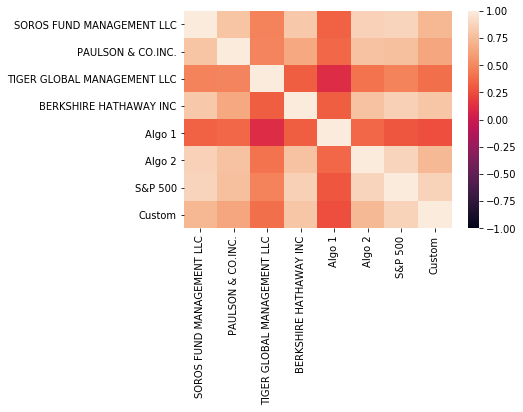

In [53]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

#### Correlation Analysis

Soros Fund Management has the highest correlation of 0.876981 with the S&P 500 followed by Algo 2 with a correlation of 0.875721 to the market. The two funds with the highest correlation are Soros Fund Management and Algo 2 with a correlation of 0.862846.

### Custom Portfolio Analysis

The custom portfolio of GOOG, AAPL, and COST carries the third highest risk by a standard deviation measure following Berkshire Hathaway and Tiger Global Management. However, the risk/reward for the custom portfolio as measured by the Sharpe ratio is the second best after Algo 1. The custom portfolio is most closely correlated with the S&P 500 followed by Berkshire Hathaway.